In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
print(torch.linspace(-1,1,100))
print(torch.unsqueeze(torch.linspace(-1,1,100),dim=1))

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

In [4]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

In [7]:
print(x.size())
print(torch.rand(x.size()))

torch.Size([100, 1])
tensor([[0.7349],
        [0.6361],
        [0.0028],
        [0.6040],
        [0.1067],
        [0.0862],
        [0.0891],
        [0.5409],
        [0.7483],
        [0.8933],
        [0.7797],
        [0.5862],
        [0.4243],
        [0.7649],
        [0.6789],
        [0.3513],
        [0.1532],
        [0.9720],
        [0.9978],
        [0.7148],
        [0.8990],
        [0.0219],
        [0.1410],
        [0.4276],
        [0.9976],
        [0.5519],
        [0.3603],
        [0.6831],
        [0.6664],
        [0.9368],
        [0.2542],
        [0.1064],
        [0.2521],
        [0.4220],
        [0.0510],
        [0.1834],
        [0.8422],
        [0.5353],
        [0.8628],
        [0.7865],
        [0.2650],
        [0.9221],
        [0.7190],
        [0.6915],
        [0.4281],
        [0.7743],
        [0.4694],
        [0.3183],
        [0.0362],
        [0.2581],
        [0.4894],
        [0.3693],
        [0.6459],
        [0.1529],
       

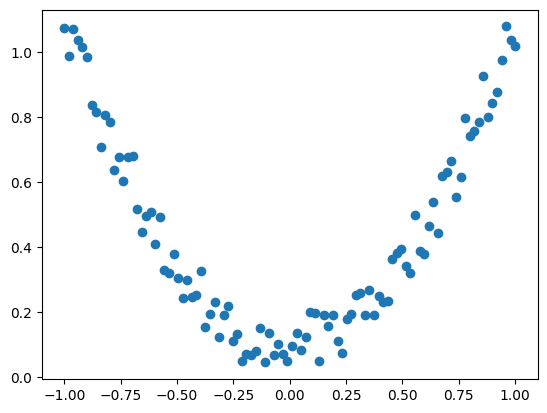

In [9]:
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [10]:
class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__() #调用父类 Module 的初始化方法，确保神经网络模块正常工作。
        self.hidden = torch.nn.Linear(n_features,n_hidden) #定义隐藏层，是一个线性层（全连接层），将输入特征映射到隐藏层
        self.predict = torch.nn.Linear(n_hidden,n_output) #定义输出层，也是一个线性层，将隐藏层的输出映射到最终输出。

    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x 

In [11]:
net = Net(1,10,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [12]:
plt.ion()
# plt.show()

In [13]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.5)
loss_func = torch.nn.MSELoss()

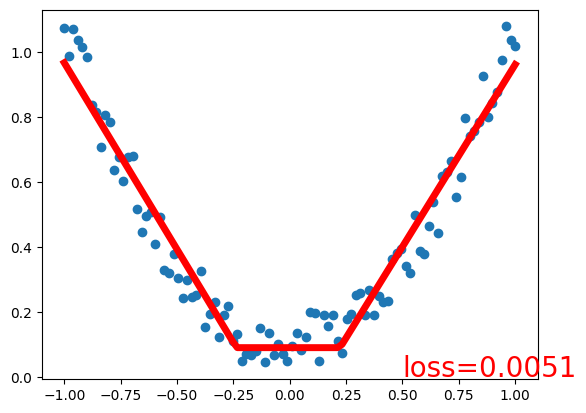

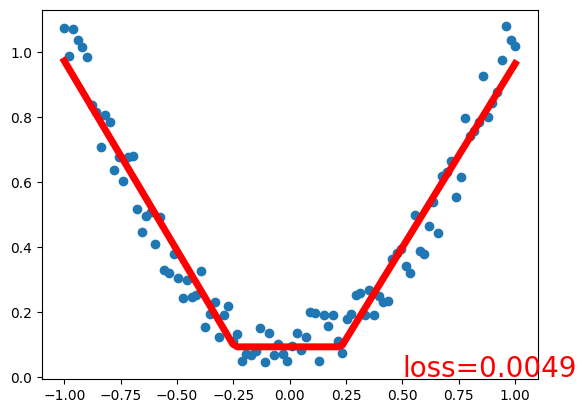

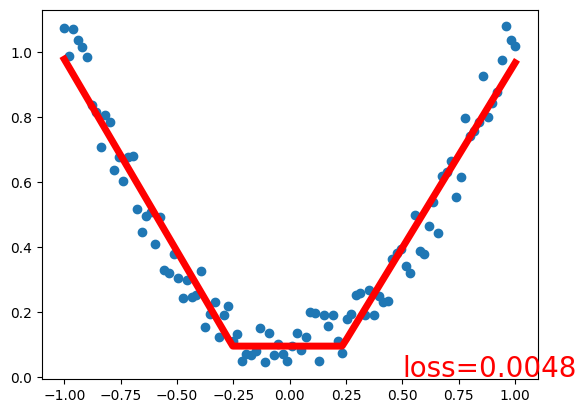

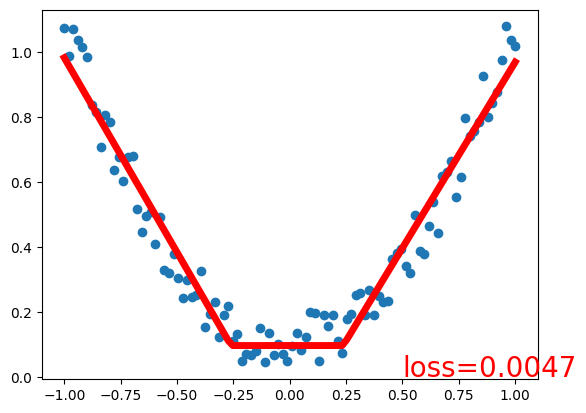

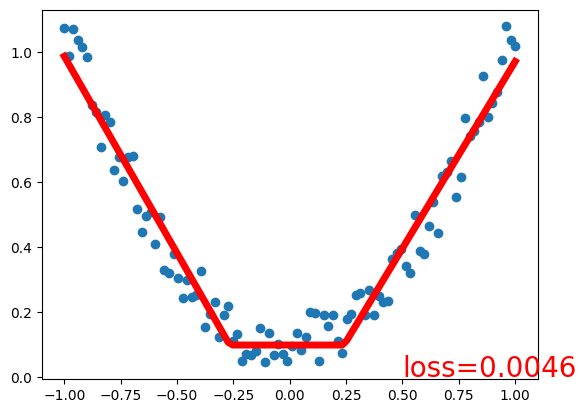

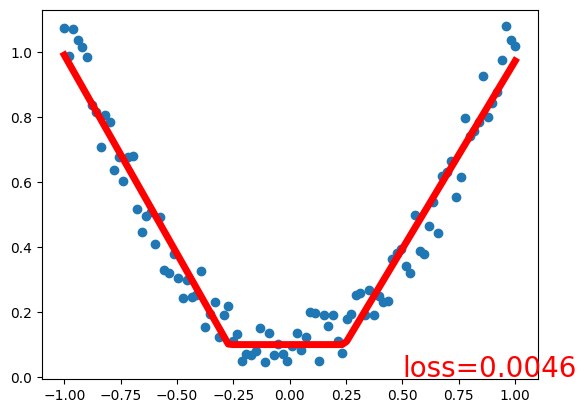

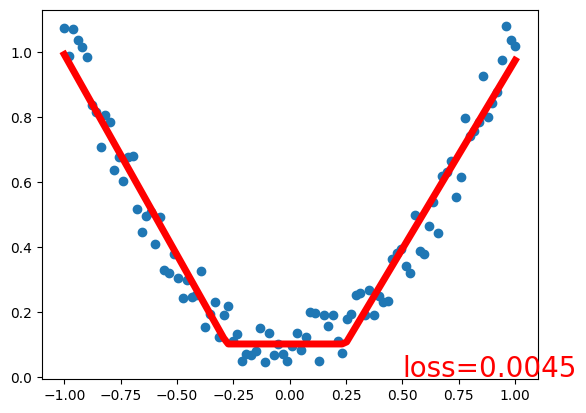

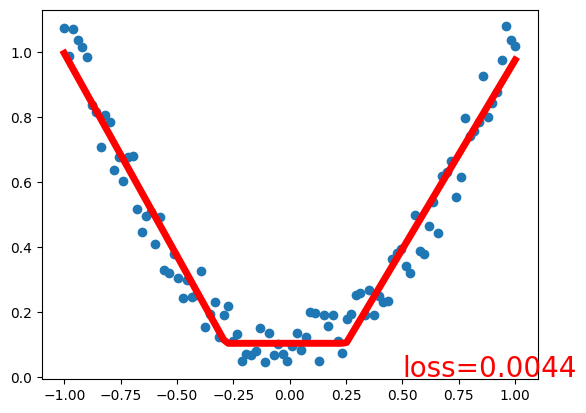

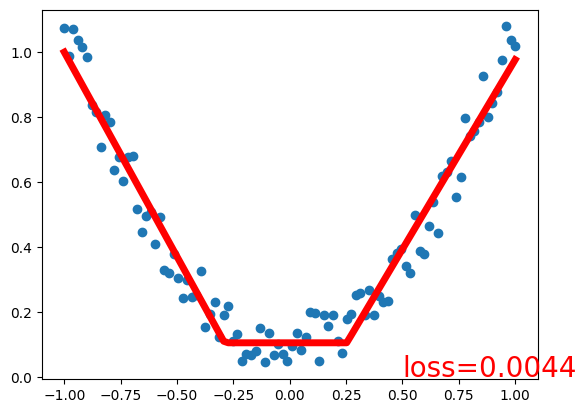

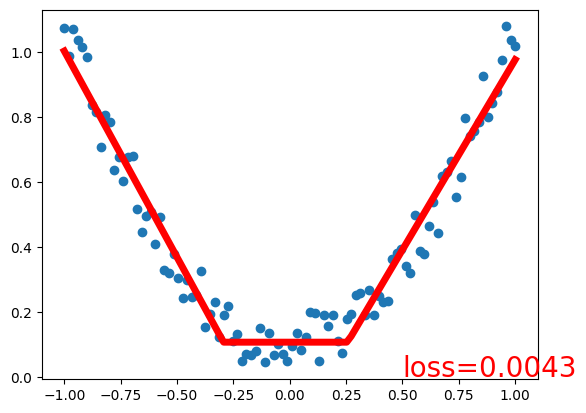

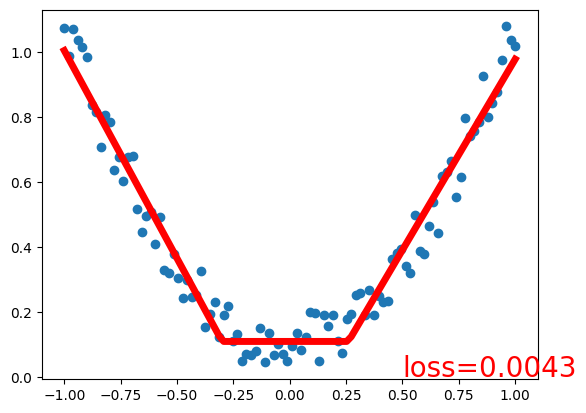

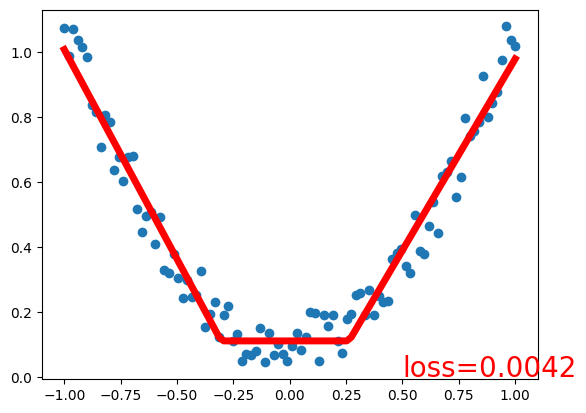

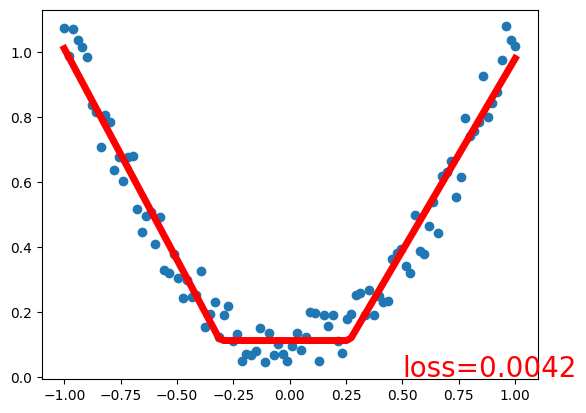

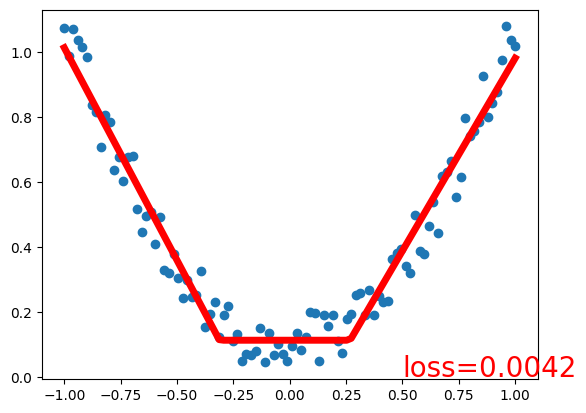

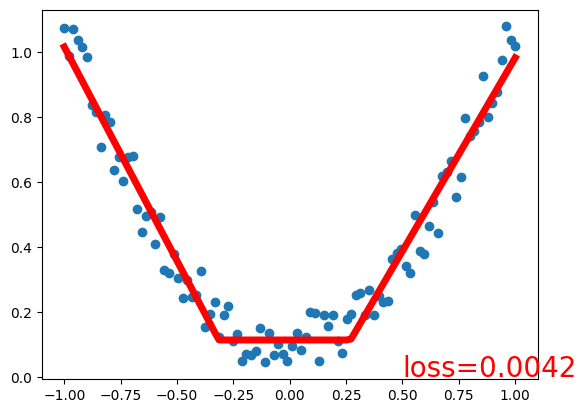

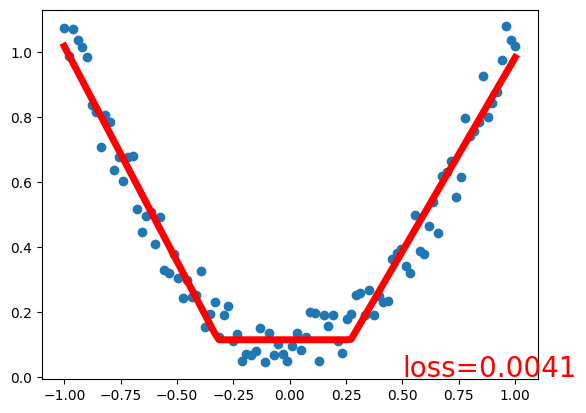

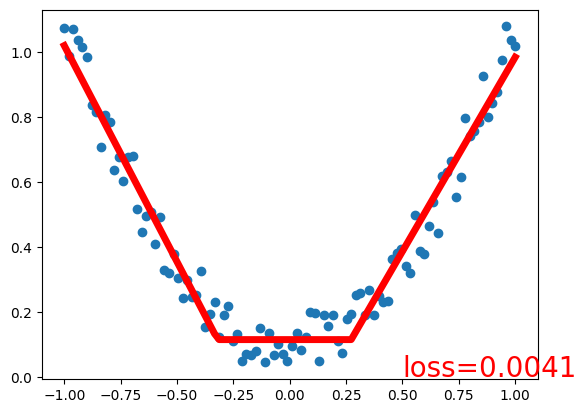

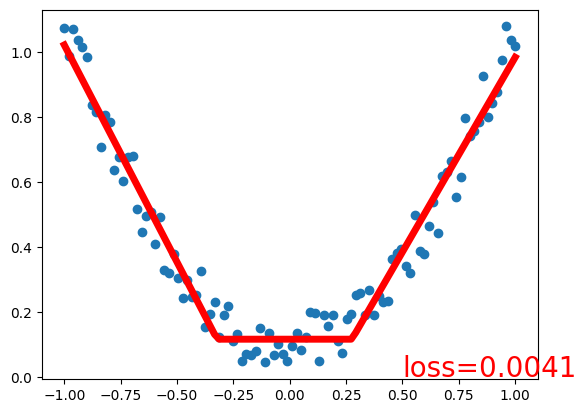

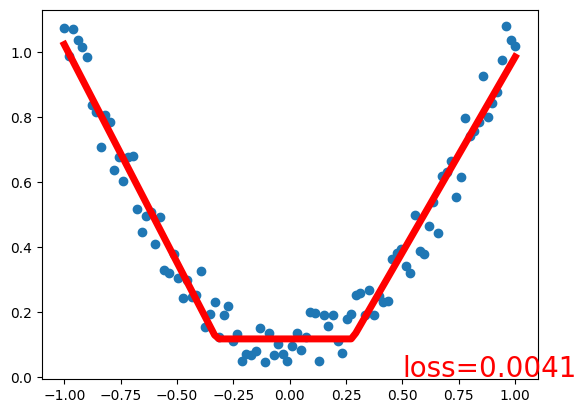

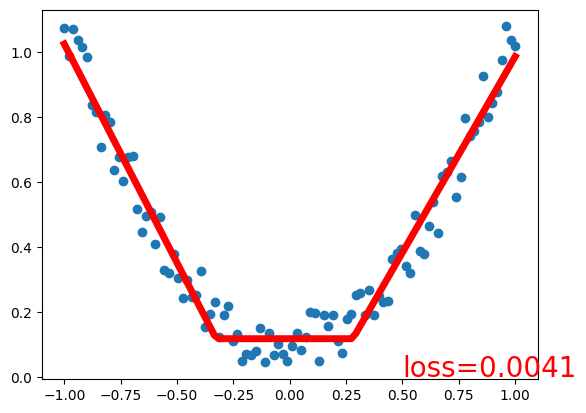

In [ ]:
for t in range(100):
    prediction = net(x)  # 前向传播：用当前网络参数计算预测值
    loss = loss_func(prediction, y)  # 计算预测值与真实值的差距（损失）

    # 以下3步是反向传播与参数更新的核心
    optimizer.zero_grad()  # 清空上一轮的梯度（避免累积）
    loss.backward()  # 反向传播：计算损失对所有参数的梯度
    optimizer.step()  # 优化器更新参数（根据梯度调整权重和偏置）
    if t % 5 == 0:  # 每5轮迭代可视化一次
        plt.cla()  # 清空当前图像
        plt.scatter(x.numpy(), y.numpy())  # 绘制真实数据点（蓝色散点）
        plt.plot(x.detach().numpy(), prediction.detach().numpy(), 'r-', lw=5)  # 绘制预测曲线（红色线）
        plt.text(0.5, 0, f'loss={loss.item():.4f}', fontdict={'size':20,'color':'red'})  # 显示当前损失值
        plt.pause(0.1)  # 暂停0.1秒，形成动态效果

plt.ioff()
plt.show()